# Chapitre 6 - Différentes utilisations du machine learning avec Python (3ème partie)

## 6.6 L’analyse textuelle avec Python
### 6.6.1 Les données textuelles en Python

Le traitement des donnés textuelles et de la sémantique sont en expansion permanente.

Les données textuelles sont la première source de données non structurées que nous pouvons traiter. Python possède tous les outils pour transformer des
données brutes en données prêtes à être traitées par des algorithmes de machine
learning. 

Elles sont fréquemment utilisées notamment pour l’analyse de sentiments, la fouille de textes, le text mining…

Nous allons détailler les différentes étapes pour préparer des données textuelles
afin de les intégrer dans des algorithmes de machine learning. Il va vous falloir de
nouveaux outils.

In [1]:
import nltk
#nltk.download()

La fenêtre suivante s’ouvre :  
<img src="../other/NLTK-downloader.png" alt="NLTK downloader" style="width: 200px;"/>
    

Vous pouvez télécharger tous les packages, ceci ne demande pas beaucoup de mémoire. Il faut néanmoins être connecté à Internet et avoir
une connexion permettant de récupérer quelques centaines de méga-octets de données.
Tous ces packages comprennent des collections, des corpus et des modèles qui
pourront vous servir dans votre approfondissement de NLTK.

Vous trouverez de nombreuses informations ici : https://www.nltk.org/

### 6.6.2 Le prétraitement des données
La première étape est de transformer les données brutes en données structurées,
nous allons avoir de nombreuses approches mais il faut dans un premier temps
simplifier les chaînes de caractères en leur appliquant des transformations adaptées
aux besoins.

Dans le cadre de cet exemple, nous allons extraire les thèmes clés d’une page
web. Nous travaillons sur la page Wikipédia en français dédiée au langage Python.

#### 1re étape : tokeniser
Il est souvent utile d’extraire des mots ou des phrases d’un texte, cette action est
appelée « tokeniser les données ».

Tous les outils de NLTK sont disponibles en anglais mais un certain nombre sont
aussi disponibles en français.

Le code suivant va utiliser le package Beautiful-Soup dont nous avons déjà parlé lors
de l’importation de données dans le chapitre 4. Nous allons récupérer les données
d’une page web directement dans une seule chaîne de caractères :

In [2]:
from bs4 import BeautifulSoup
import urllib.request
# on récupère dans reponse les données de la page
reponse = urllib.request.urlopen( 'https://fr.wikipedia.org/wiki/Python_(langage)')
# on extrait le texte en html
html = reponse.read()
# on crée un objet de la classe BeautifulSoup pour
# traiter le code html
soup = BeautifulSoup(html,"html5lib")
# on récupère tout le code à partir d’une balise à partri de
# laquelle on s’intéresse aux données
tag = soup.find('div', {'class' : 'mw-parser-output'})
# on extrait le text du code
text=tag.text

print(type(text),len(text), sep=",")

<class 'str'>,55899


Notre objectif est maintenant d’extraire les mots de cette chaîne. Nous pouvons
utiliser :

In [3]:
tokens=nltk.word_tokenize(text.lower(),language="french")
print(type(tokens),len(tokens))

<class 'list'> 10448


On obtient donc une liste de 8 397 tokens qui sont des groupes de caractères
en minuscules. Si on regarde ces termes en utilisant la classe FreqDist qui nous
permet d’étudier les fréquences, on a :

In [4]:
freq = nltk.FreqDist(tokens)
freq.most_common(10)

[(',', 532),
 ('de', 354),
 ('(', 233),
 (')', 233),
 ('.', 214),
 ('python', 213),
 ('[', 160),
 (']', 160),
 ('la', 156),
 ('le', 153)]

On voit bien que la plupart des mots sont inintéressants.

#### 2e étape : Nettoyage des mots peu importants

Débarrassons-nous de ce qu’on appelle les stopwords. Il s’agit de mots courants
qui n’ont pas d’influence sur le sens du texte.
NLTK possède une liste de stopwords en français. Nous allons de plus ajouter des
termes spécifiques et enlever la ponctuation résiduelle en utilisant le module string de Python :

In [5]:
%matplotlib inline
from nltk.corpus import stopwords
import string

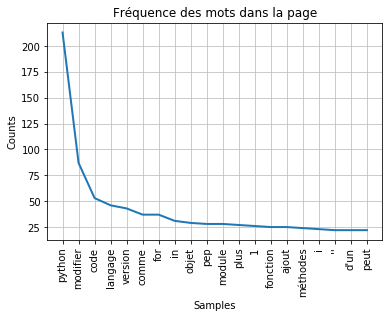

In [6]:
# création d’une liste de mots, combinée à des mots personnalisés
# et à la liste de ponctuation
sr = stopwords.words('french')+['les','a','il','↑','«','»','·','``']\
            +list(string.punctuation)

# on crée tokens_propres qui consiste en tokens duquel on a retiré les tokens
# indésirables
tokens_propres = [i for i in tokens if i not in sr]
# on crée un objet pour calculer les fréquences et on affiche le graphique
freq = nltk.FreqDist(tokens_propres)
freq.plot(20, title="Fréquence des mots dans la page")

On obtient un graphique de distribution des mots. On voit que
dans cette page sur le langage Python, on retrouve de nombreux mots clés de cet
ouvrage.

On peut aussi utiliser d’autres outils de NLTK tel que sent_tokenize qui va extraire
des phrases. On peut récupérer des synonymes, par exemple, en utilisant le package
de NLTK nommé WordNet qui possède aussi des synonymes en français.

Jusqu’ici nous avons fait en sorte de transformer des données textuelles non structurées
afin d’éliminer des informations peu importantes et de les structurer. Ce que
nous voulons faire maintenant, c’est traiter ce type de données avec du machine
learning.

### 6.6.3 La mise en place d’un premier modèle prédictif

Nous allons donc partir d’un exemple pratique simple, il s’agit de construire un filtre
anti SMS indésirables (spam) pour notre téléphone portable.

L’identification des messages non désirables se base sur des techniques d’apprentissage
combinées à un prétraitement des données.

Nous commençons par récupérer des données (disponibles sur le site associé à
l’ouvrage). Ces données sont décrites plus en détail au début du chapitre 4 :

In [7]:
import pandas as pd
# recuperation des données
data_sms=pd.read_table("../data/SMSSpamCollection",
                       names=["label", "message"])
# statistique des labels
data_sms["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Scikit-Learn propose des classes pour ces deux approches mais comme on les
combine généralement, on préfère utiliser la classe TfidfVectorizer :

In [8]:
from sklearn.preprocessing import LabelEncoder
# on commence par transformer notre variable à prédire en variable binaire
encode_y=LabelEncoder()
y=encode_y.fit_transform(data_sms["label"])

In [9]:
# on sépare en apprentissage/validation
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_sms["message"],y,test_size=0.2)

In [10]:
# on transforme en matrice creuse d’occurrence des mots (on transforme x_train
# et on applique à x_test la transformation)
from sklearn.feature_extraction.text import TfidfVectorizer

trans_vect=TfidfVectorizer()

x_train_trans=trans_vect.fit_transform(x_train)
x_test_trans=trans_vect.transform(x_test)

Une fois la transformation effectuée, nous pouvons appliquer un modèle prédictif
sur les données obtenues afin d’apprendre les paramètres du modèle. On essayera
le classifieur bayésien naïf et les support vector machines :

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# on définit deux modèles
modele_bayes=MultinomialNB()
modele_svm=SVC()

In [12]:
modele_bayes.fit(x_train_trans, y_train)
modele_svm.fit(x_train_trans, y_train)

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
# on vérifie la qualité du modèle sur les données de vaildation
from sklearn.metrics import roc_auc_score, accuracy_score
print("Accuracy pour naive Bayes:",
accuracy_score(y_test, modele_bayes.predict(x_test_trans)))
print("AUC pour naive Bayes:",
roc_auc_score(y_test, modele_bayes.predict(x_test_trans)))

Accuracy pour naive Bayes: 0.9632286995515695
AUC pour naive Bayes: 0.8660130718954249


In [14]:
print("Accuracy pour SVC :", accuracy_score(y_test, modele_svm.predict(x_test_trans)))
print("AUC pour SVC :", roc_auc_score(y_test, modele_svm.predict(x_test_trans)))

Accuracy pour SVC : 0.862780269058296
AUC pour SVC : 0.5


Il ressort que Naive Bayes est bien plus adapté.

On va donc construire un pipeline de traitement :

In [15]:
from sklearn.pipeline import make_pipeline
import numpy as np
# on construit un pipeline de traitement
pipe_text=make_pipeline(TfidfVectorizer(),MultinomialNB())
# on l’ajuste à toutes les données
# sachant qu’on a déjà validé le modèle
pipe_text.fit(data_sms["message"],y)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [16]:
# on crée une fonction de filtre qui affiche un message
def message_filter(message) :
    arr_mess=np.array([message])
    result=encode_y.inverse_transform(pipe_text.predict(arr_mess))[0]
    print("The message you received is a :", result)

In [17]:
# on appelle la fonction message_filter avec un nouveau message
message_filter("URGENT, You are a Winner")

The message you received is a : spam


In [18]:
message_filter("Hello, how are u?")

The message you received is a : ham


On a donc créé une fonction qui permet de prédire si n’importe quel message est
un SMS indésirable. 

Il ne reste plus qu’à sauvegarder le modèle dans un fichier pickle pour une intégration dans un produit qui peut être une extension de votre
application de messages.